In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
cwd = os.getcwd()

In [3]:
ip_filepath = cwd+'\\WineQT.csv'

In [4]:
wq_df = pd.read_csv(ip_filepath)

In [5]:
print("Basic Profiling for the dataframe: ")
print("----------------------------------")
print("Number of features: ",wq_df.shape[1])
print("Number of records: ",wq_df.shape[0])
print("Size of the dataframe: ",wq_df.size,'')

Basic Profiling for the dataframe: 
----------------------------------
Number of features:  13
Number of records:  1143
Size of the dataframe:  14859 


In [6]:
print("Detailed Statistics: ")
print("----------------------------------")
print(wq_df.describe())

Detailed Statistics: 
----------------------------------
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.0

In [7]:
print("Detailed Information: ")
print("----------------------------------")
print(wq_df.info())

Detailed Information: 
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [8]:
print("Checking Null Values: ")
print(wq_df.isnull().sum())

Checking Null Values: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [9]:
print(wq_df.dtypes.value_counts())
print("The dataframe has only numeric values")

float64    11
int64       2
dtype: int64
The dataframe has only numeric values


### EDA

In [10]:
wq = wq_df.copy()

In [11]:
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
wq.drop('Id',axis=1, inplace=True)
print("Dropped the Id column as it is an index column, and the df has already possess an index column")

Dropped the Id column as it is an index column, and the df has already possess an index column


In [13]:
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

#### The target variable is quality and all others are predictors

### Univariate Analysis:

#### Target Variable - Quality

In [15]:
def configure_plots(chart,xlab,ylab,desc):
    chart.set(xlabel = xlab, ylabel = ylab, title = desc)

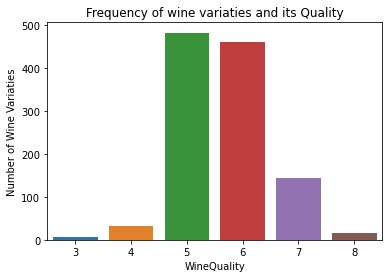

In [16]:
chart = sb.countplot(x='quality',data=wq)
configure_plots(chart,"WineQuality","Number of Wine Variaties","Frequency of wine variaties and its Quality")

In [17]:
print(wq.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [18]:
## Renaming the colmumns :- Space removal and Title Case

def replace_spaces(df):
    return df.columns.str.replace(" ","_")
def title_name(df):
    return df.columns.str.title()


In [19]:
wq.columns = replace_spaces(wq)
wq.columns = title_name(wq)

In [20]:
print(wq.columns)

Index(['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar',
       'Chlorides', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density',
       'Ph', 'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')


In [21]:
def feat_analysis(feature):
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)
    sb.distplot(feature)
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sb.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    
    plt.show()

*******************************************Fixed_Acidity********************************************


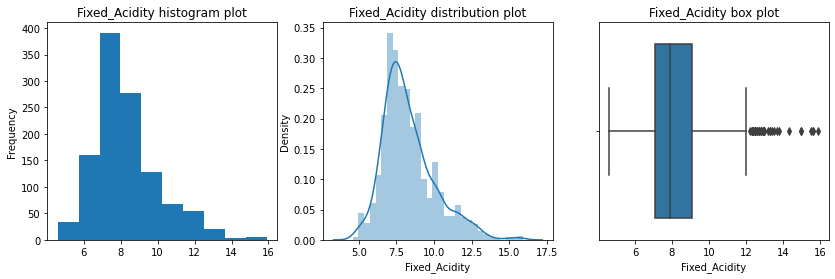


******************************************Volatile_Acidity******************************************


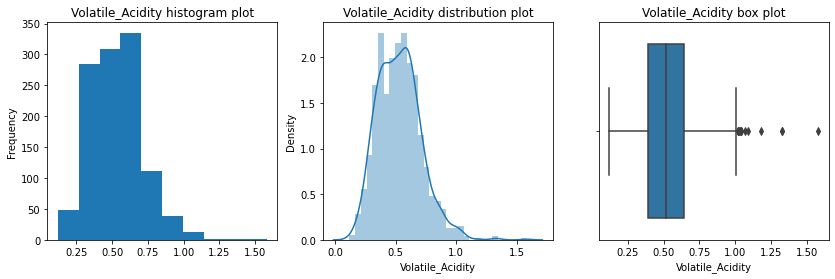


********************************************Citric_Acid*********************************************


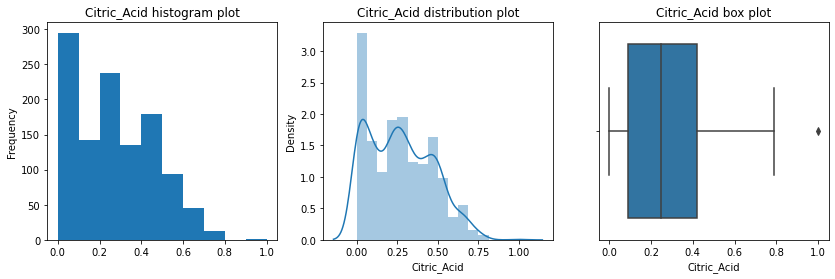


*******************************************Residual_Sugar*******************************************


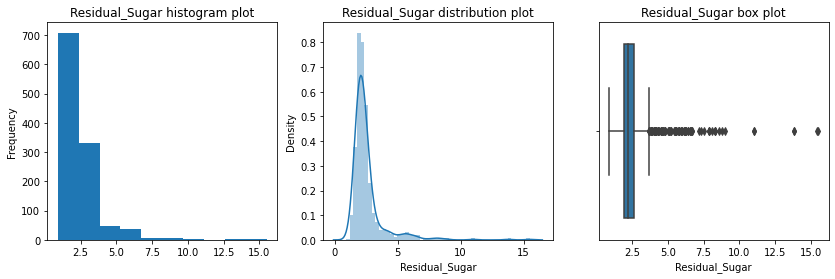


*********************************************Chlorides**********************************************


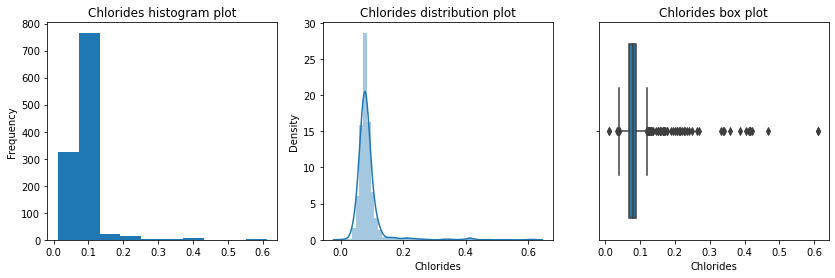


****************************************Free_Sulfur_Dioxide*****************************************


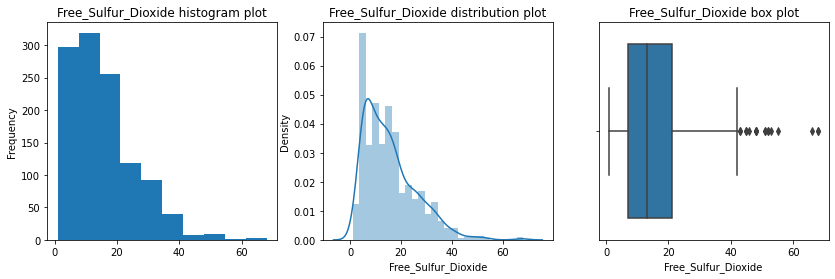


****************************************Total_Sulfur_Dioxide****************************************


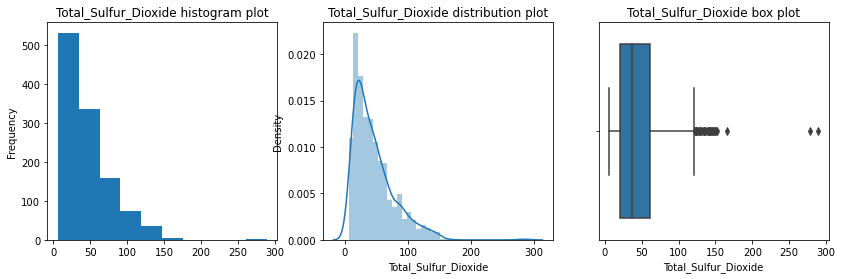


**********************************************Density***********************************************


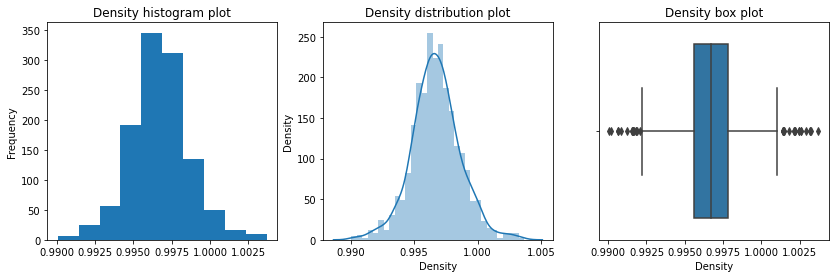


*************************************************Ph*************************************************


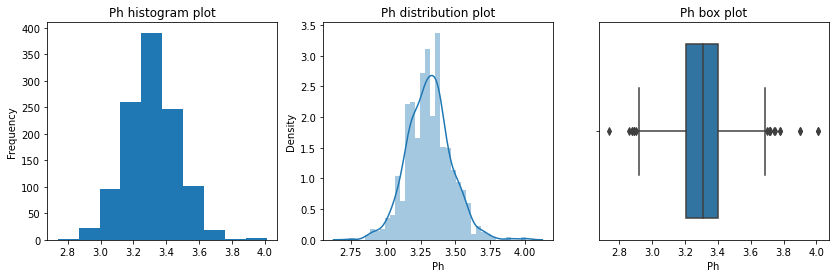


*********************************************Sulphates**********************************************


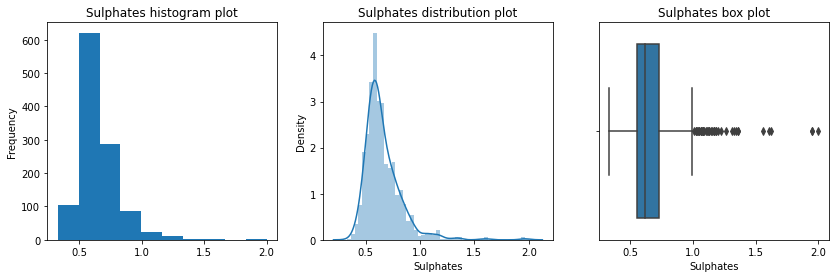


**********************************************Alcohol***********************************************


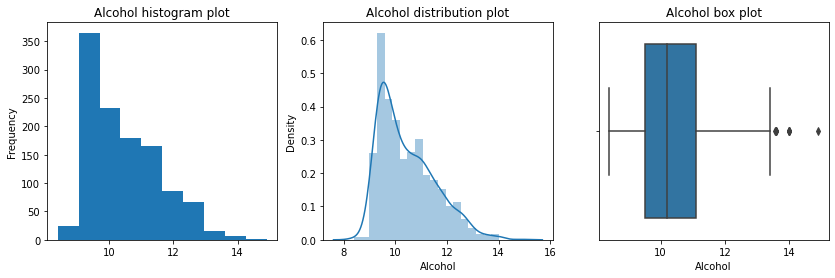

In [22]:
import warnings
warnings.filterwarnings("ignore")

for i in wq.columns[:11]:
    print(i.center(100,"*"))
    feat_analysis(wq[i])
    print()

#### All the predictors are numeric and normally distributes

### Co-Relation between all the predictors vs target variable:

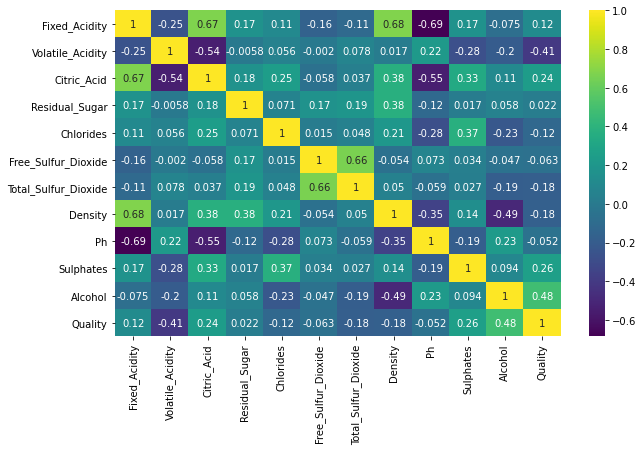

In [23]:
plt.figure(figsize=(10,6))
sb.heatmap(wq.corr(),cmap="viridis", annot=True)
plt.show()

In [24]:
print(wq.columns)

Index(['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar',
       'Chlorides', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density',
       'Ph', 'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
target = wq.loc[:,'Quality']

In [27]:
predictors = wq.loc[:, wq.columns != 'Quality']

### Splitting the data into train set and test set

In [28]:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

In [29]:
print(f'Shape of the f_train: {f_train.shape}')
print(f'Shape of the f_test: {f_test.shape}')
print(f'Shape of the t_train: {t_train.shape}')
print(f'Shape of the t_test: {t_test.shape}')

Shape of the f_train: (800, 11)
Shape of the f_test: (343, 11)
Shape of the t_train: (800,)
Shape of the t_test: (343,)


### Decision Tree Classifier

In [30]:
dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)

In [31]:
dtc_pred = dtc_mod.predict(f_test)

In [32]:
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  5 99 41  4  0]
 [ 1  1 35 82 17  3]
 [ 0  0  3 16 20  3]
 [ 0  0  0  1  0  1]]


In [33]:
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Accuracy score of the Decision Tree Model: 
58.89 %


### Increased the size of train data, the model performed well

In [34]:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.2, random_state = 101)

In [35]:
dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)
dtc_pred = dtc_mod.predict(f_test)

In [36]:
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  2  2  1  0]
 [ 0  1 71 26  4  0]
 [ 0  2 23 53 10  3]
 [ 0  0  3 10 14  0]
 [ 0  0  0  1  0  1]]
Accuracy score of the Decision Tree Model: 
61.14 %


### Standardize and fiting the model

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

In [40]:
scaler.fit(f_train)

StandardScaler()

In [41]:
print("Before Standardizing: \n {} ".format(f_train.head()))

Before Standardizing: 
       Fixed_Acidity  Volatile_Acidity  Citric_Acid  Residual_Sugar  Chlorides  \
1127            8.0              0.30         0.63            1.60      0.081   
836             6.8              0.66         0.07            1.60      0.070   
186             8.0              0.52         0.03            1.70      0.070   
619             8.8              0.31         0.40            2.80      0.109   
483             8.5              0.46         0.31            2.25      0.078   

      Free_Sulfur_Dioxide  Total_Sulfur_Dioxide  Density    Ph  Sulphates  \
1127                 16.0                  29.0  0.99588  3.30       0.78   
836                  16.0                  61.0  0.99572  3.29       0.60   
186                  10.0                  35.0  0.99575  3.34       0.57   
619                   7.0                  16.0  0.99614  3.31       0.79   
483                  32.0                  58.0  0.99800  3.33       0.54   

      Alcohol  
1127     1

In [42]:
f_train=(scaler.transform(f_train))
print("After Standardizing: \n {} ".format(f_train))

After Standardizing: 
 [[-0.19742891 -1.30883779  1.81301168 ... -0.05459837  0.68261146
   0.3415627 ]
 [-0.88067243  0.70465125 -0.9887449  ... -0.11753598 -0.33642286
  -1.06292126]
 [-0.19742891 -0.07837226 -1.18887037 ...  0.19715205 -0.50626191
  -0.40749542]
 ...
 [-0.31130283 -0.69360502  2.06316851 ... -1.43922568  3.68310139
  -1.06292126]
 [ 0.99824725 -1.25290753  0.41213339 ... -0.432224    0.96567655
   0.71609175]
 [ 1.45374294 -1.19697728  1.26266663 ... -0.18047358  0.62599844
   0.99698854]] 


In [43]:
# Similarly, modify the scales in test dataset
scaler.fit(f_test)
f_test=(scaler.transform(f_test))

In [44]:
# Fit the model
dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)

In [45]:
# Predict the wine quality
dtc_pred = dtc_mod.predict(f_test)

In [46]:
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 4  4 96 42  3  0]
 [ 1  1 38 77 18  4]
 [ 0  0  4 22 14  2]
 [ 0  0  0  2  0  0]]
Accuracy score of the Decision Tree Model: 
54.52 %


In [47]:
# Changed the train-test split size:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.2, random_state = 101)

# Standardize the train data
scaler.fit(f_train)
f_train=(scaler.transform(f_train))

# Standardize the test data
scaler.fit(f_test)
f_test=(scaler.transform(f_test))

# Fitting the model
dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)

# Prediction
dtc_pred = dtc_mod.predict(f_test)

# Model Evaluation using confusion Matrix and Accuracy Score
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  2  4  0  0]
 [ 0  3 75 22  2  0]
 [ 0  0 21 56 11  3]
 [ 0  0  3 10 12  2]
 [ 0  0  0  0  1  1]]
Accuracy score of the Decision Tree Model: 
62.88 %


### Standardize Whole Predictors and then performing train-test split

In [48]:
scaler.fit(predictors)
predictors=(scaler.transform(predictors))

In [49]:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.3, random_state = 101)

dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)

# Prediction
dtc_pred = dtc_mod.predict(f_test)

# Model Evaluation using confusion Matrix and Accuracy Score
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 1  5 97 43  3  0]
 [ 1  1 35 82 17  3]
 [ 0  0  2 16 23  1]
 [ 0  0  0  1  0  1]]
Accuracy score of the Decision Tree Model: 
59.18 %


In [50]:
f_train, f_test, t_train, t_test = train_test_split(predictors, target, test_size = 0.2, random_state = 101)

dtc = DecisionTreeClassifier()
dtc_mod = dtc.fit(f_train, t_train)

# Prediction
dtc_pred = dtc_mod.predict(f_test)

# Model Evaluation using confusion Matrix and Accuracy Score
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  1  3  1  0]
 [ 0  1 69 30  2  0]
 [ 0  2 21 59  8  1]
 [ 0  0  3  7 17  0]
 [ 0  0  0  0  1  1]]
Accuracy score of the Decision Tree Model: 
64.19 %


In [51]:
from sklearn.tree import plot_tree

[Text(161.72249445266272, 211.04470588235293, 'X[10] <= 0.077\ngini = 0.644\nsamples = 914\nvalue = [5, 27, 381, 371, 116, 14]'),
 Text(97.83572485207101, 198.25411764705882, 'X[9] <= -0.427\ngini = 0.554\nsamples = 559\nvalue = [5, 17, 316, 197, 22, 2]'),
 Text(43.94456360946746, 185.4635294117647, 'X[5] <= 1.453\ngini = 0.428\nsamples = 247\nvalue = [3, 9, 178, 56, 1, 0]'),
 Text(35.721079881656806, 172.6729411764706, 'X[10] <= -0.64\ngini = 0.463\nsamples = 215\nvalue = [3, 8, 147, 56, 1, 0]'),
 Text(23.236242603550295, 159.88235294117646, 'X[8] <= 1.494\ngini = 0.399\nsamples = 122\nvalue = [2, 6, 92, 21, 1, 0]'),
 Text(21.9155325443787, 147.09176470588235, 'X[10] <= -1.287\ngini = 0.377\nsamples = 119\nvalue = [2, 6, 92, 18, 1, 0]'),
 Text(16.013609467455623, 134.30117647058825, 'X[8] <= 0.504\ngini = 0.688\nsamples = 8\nvalue = [1, 1, 3, 3, 0, 0]'),
 Text(14.692899408284024, 121.51058823529411, 'X[3] <= -0.54\ngini = 0.667\nsamples = 6\nvalue = [1, 1, 1, 3, 0, 0]'),
 Text(12.0514

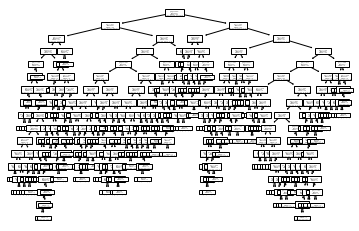

In [52]:
plot_tree(dtc)

#### Tuning the model for better performance

In [53]:

dtc = DecisionTreeClassifier(min_samples_leaf = 5)
dtc_mod = dtc.fit(f_train, t_train)

# Prediction
dtc_pred = dtc_mod.predict(f_test)

# Model Evaluation using confusion Matrix and Accuracy Score
print("Confusion Matrix of the Decision Tree Model: \n {}".format(confusion_matrix(t_test, dtc_pred)))
print("Accuracy score of the Decision Tree Model: \n{} %".format(round(accuracy_score(t_test, dtc_pred)*100,2)))

Confusion Matrix of the Decision Tree Model: 
 [[ 0  0  0  1  0  0]
 [ 0  1  4  1  0  0]
 [ 0  1 70 29  2  0]
 [ 0  0 29 54  8  0]
 [ 0  0  2 10 15  0]
 [ 0  0  0  0  2  0]]
Accuracy score of the Decision Tree Model: 
61.14 %


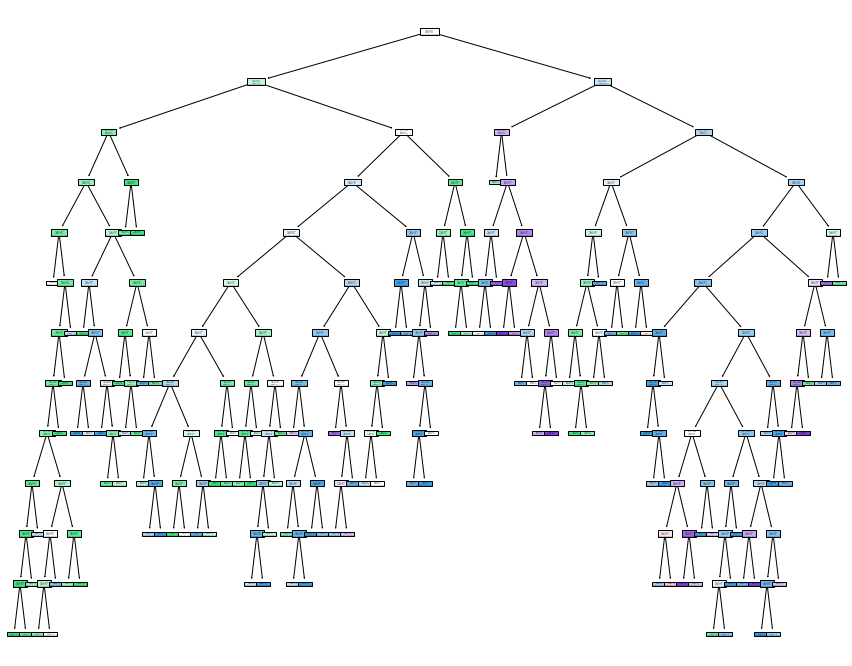

In [54]:
plt.figure(figsize=(15,12))
plot_tree(dtc, filled=True)
plt.show()

In [59]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [61]:
target_bin = label_binarize(target, classes=[3, 4, 5, 6, 7, 8])
n_classes = target_bin.shape[1]

In [62]:

# shuffle and split training and test sets
f_train, f_test, t_train, t_test = train_test_split(predictors, target_bin, test_size = 0.2, random_state = 101)

dtc = DecisionTreeClassifier(min_samples_leaf = 5)
dtc_mod = dtc.fit(f_train, t_train)

# Prediction
dtc_pred = dtc_mod.predict(f_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(t_test[:, i], dtc_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(t_test.ravel(), dtc_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

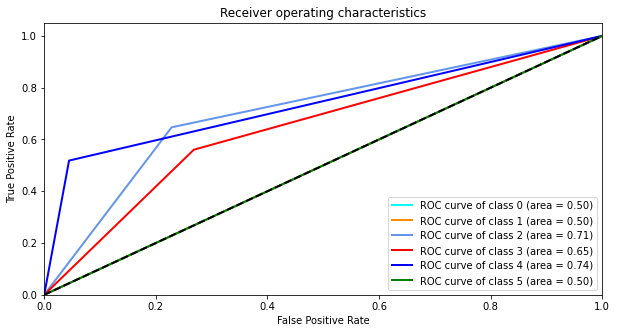

In [74]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,5))

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red", "blue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1],"k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")
plt.show()